<a href="https://colab.research.google.com/github/Vanitharavi245/Vanitha/blob/main/Regression_model_california.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multiple Linear Regression

Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing Dataset

In [2]:
dataset = pd.read_csv('/content/california_housing.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print("Null values in the DataFrame:")
print(dataset.isna().sum())

Null values in the DataFrame:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


In [4]:
print(X)

[[-122.23 37.88 41 ... 126 8.3252 'NEAR BAY']
 [-122.22 37.86 21 ... 1138 8.3014 'NEAR BAY']
 [-122.24 37.85 52 ... 177 7.2574 'NEAR BAY']
 ...
 [-121.22 39.43 17 ... 433 1.7 'INLAND']
 [-121.32 39.43 18 ... 349 1.8672 'INLAND']
 [-121.24 39.37 16 ... 530 2.3886 'INLAND']]


In [5]:
print(y)

[452600 358500 352100 ...  92300  84700  89400]


Encoding Categorical data

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [7]:
print(X)

[[0.0 0.0 0.0 ... 322 126 8.3252]
 [0.0 0.0 0.0 ... 2401 1138 8.3014]
 [0.0 0.0 0.0 ... 496 177 7.2574]
 ...
 [0.0 1.0 0.0 ... 1007 433 1.7]
 [0.0 1.0 0.0 ... 741 349 1.8672]
 [0.0 1.0 0.0 ... 1387 530 2.3886]]


Splitting dataset into training and testing

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Training the multiple linear Regression on Training set


In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting the Test set results

In [10]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[189847.43  98900.  ]
 [175807.02 153000.  ]
 [123403.18  91300.  ]
 ...
 [155109.65 127000.  ]
 [217118.62 158600.  ]
 [250189.81 175000.  ]]


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE, MSE, and R² score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Absolute Error: 49964.01
Mean Squared Error: 4651447496.46
R-squared: 0.65


## Getting the final linear regression equation with the values of the coefficients



In [18]:
print(regressor.coef_)
print(regressor.intercept_)

[-2.58e+04 -6.41e+04  1.42e+05 -2.98e+04 -2.27e+04 -2.78e+04 -2.63e+04
  1.09e+03 -5.97e+00  1.01e+02 -3.58e+01  4.23e+01  3.91e+04]
-2333801.822611121


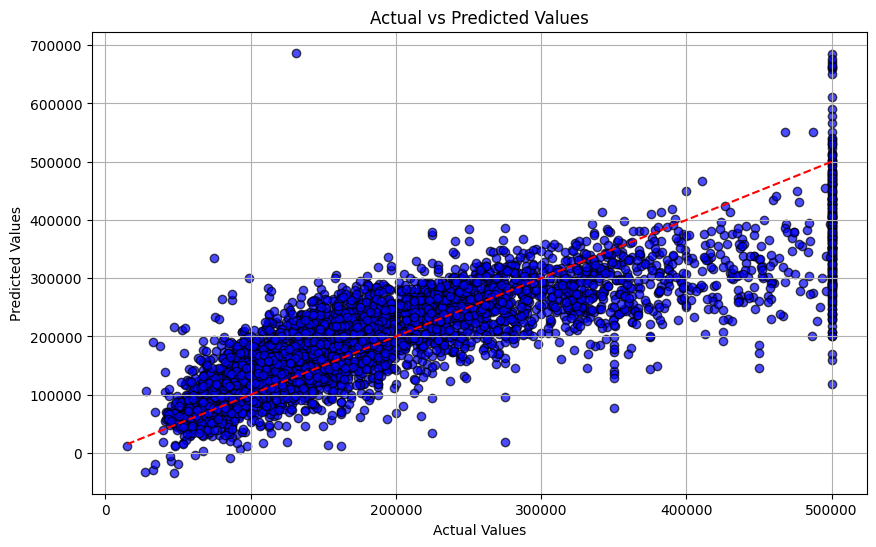

In [13]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


Assumptions Checking

Linearity

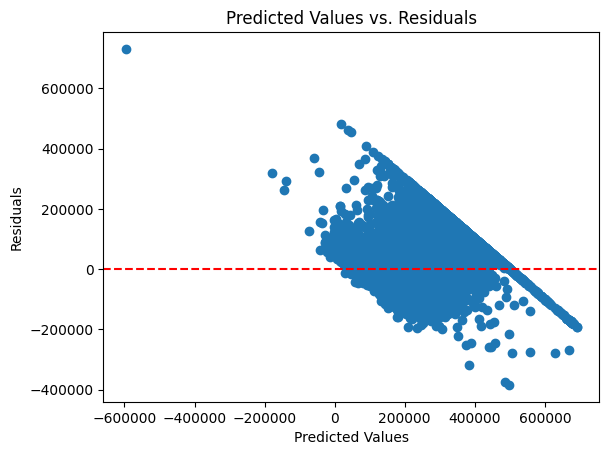

In [14]:
# Predict on training set
y_train_pred = regressor.predict(X_train)
residuals = y_train - y_train_pred

# Plot predicted values vs. residuals
plt.scatter(y_train_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs. Residuals')
plt.show()

Independence

In [15]:
from statsmodels.stats.stattools import durbin_watson

# Compute Durbin-Watson statistic
dw = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw:.2f}')


Durbin-Watson statistic: 1.98


Homoscedasticity

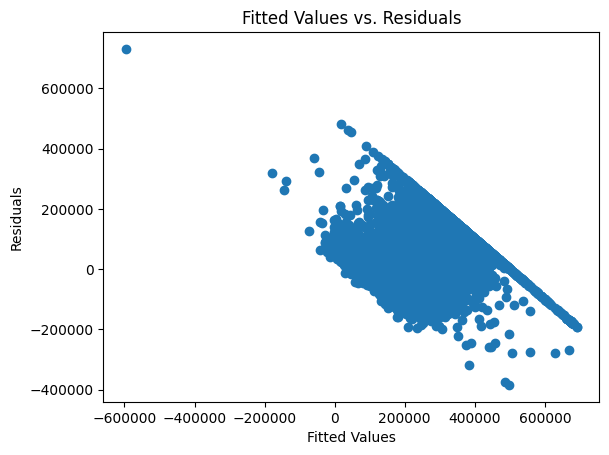

In [16]:
# Calculate fitted values
y_train_fitted = regressor.predict(X_train)

# Plot residuals vs. fitted values
plt.scatter(y_train_fitted, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals')
plt.show()


Normality

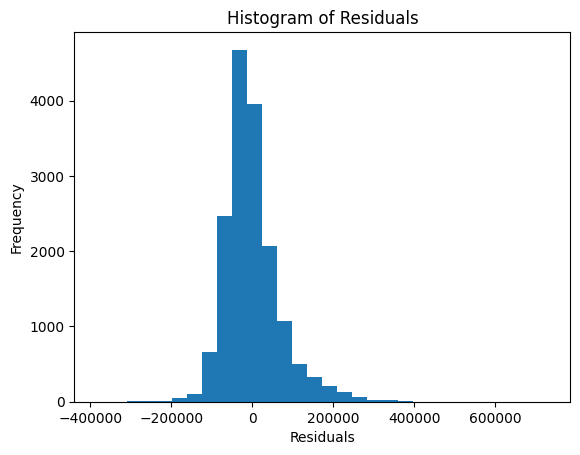

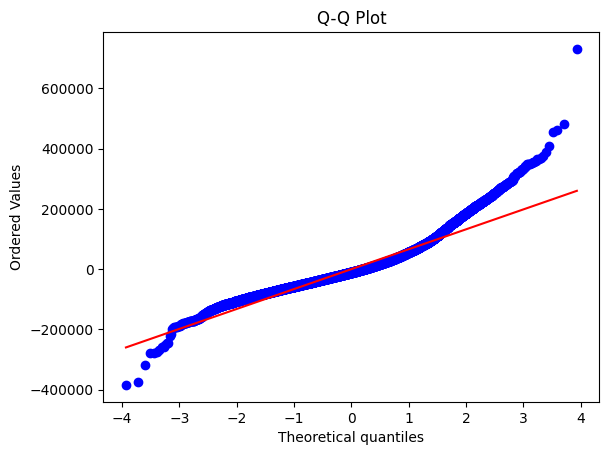

In [17]:
# Histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

import scipy.stats as stats

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


# **PCA MODEL**

In [19]:
import pandas as pd
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('/content/california_housing.csv')
X = dataset.drop('median_house_value', axis=1)
y = dataset['median_house_value']

# One-hot encode categorical variable and standardize numeric variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']),
        ('cat', OneHotEncoder(), ['ocean_proximity'])
    ])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

Apply PCA

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_transformed)
X_test_pca = pca.transform(X_test_transformed)

print(f"Number of principal components: {X_train_pca.shape[1]}")


Number of principal components: 6


Predict Test set


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fit the regression model
regressor = LinearRegression()
regressor.fit(X_train_pca, y_train)

y_pred = regressor.predict(X_test_pca)

Evaluate the model



In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_test and y_pred are already defined from the previous steps
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 5189374170.962136
R-squared: 0.6205261011060057
Mean Absolute Error: 52178.595573196966


## **POLYNOMIAL REGRESSION**

In [27]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
dataset = pd.read_csv('/content/california_housing.csv')

# Separate features (X) and target variable (y)
X = dataset.drop('median_house_value', axis=1)
y = dataset['median_house_value']

# One-hot encode the categorical feature
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(X[['ocean_proximity']])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['ocean_proximity']))

# Drop the original categorical column and concatenate the encoded features
X = X.drop('ocean_proximity', axis=1)
X = pd.concat([X.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Generate polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable on both training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Training R-squared: {train_r2:.2f}')
print(f'Testing R-squared: {test_r2:.2f}')
print(f'Training MSE: {train_mse:.2f}')
print(f'Testing MSE: {test_mse:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training R-squared: 0.71
Testing R-squared: -648684536192850944.00
Training MSE: 3780200909.99
Testing MSE: 8870878305551385133943095296.00


Ridge Regression to standardise the data


In [28]:
from sklearn.linear_model import Ridge

# Train the Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict the target variable on both training and testing sets
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge model
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
train_mae_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
test_mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)

print(f'Training R-squared (Ridge): {train_r2_ridge:.2f}')
print(f'Testing R-squared (Ridge): {test_r2_ridge:.2f}')
print(f'Training MSE (Ridge): {train_mse_ridge:.2f}')
print(f'Testing MSE (Ridge): {test_mse_ridge:.2f}')
print(f'Training MAE (Ridge): {train_mae_ridge:.2f}')
print(f'Testing MAE (Ridge): {test_mae_ridge:.2f}')


Training R-squared (Ridge): 0.71
Testing R-squared (Ridge): 0.71
Training MSE (Ridge): 3780376633.85
Testing MSE (Ridge): 3979819736.25
Training MAE (Ridge): 43788.84
Testing MAE (Ridge): 45063.92


Lasso Regression

In [29]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

dataset = pd.read_csv('/content/california_housing.csv')

# Separate features (X) and target variable (y)
X = dataset.drop('median_house_value', axis=1)
y = dataset['median_house_value']

# One-hot encode the categorical feature
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(X[['ocean_proximity']])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['ocean_proximity']))

# Drop the original categorical column and concatenate the encoded features
X = X.drop('ocean_proximity', axis=1)
X = pd.concat([X.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Generate polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the Lasso Regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Predict the target variable on both training and testing sets
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Calculate Adjusted R-squared
def adjusted_r2(r2, n, p):
    """Calculate Adjusted R-squared."""
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

n_train = X_train.shape[0]
p_train = X_train.shape[1]
n_test = X_test.shape[0]
p_test = X_test.shape[1]

train_r2_adj = adjusted_r2(train_r2, n_train, p_train)
test_r2_adj = adjusted_r2(test_r2, n_test, p_test)

print(f'Lasso Training R-squared: {train_r2:.2f}')
print(f'Lasso Testing R-squared: {test_r2:.2f}')
print(f'Lasso Training Adjusted R-squared: {train_r2_adj:.2f}')
print(f'Lasso Testing Adjusted R-squared: {test_r2_adj:.2f}')
print(f'Lasso Training MSE: {train_mse:.2f}')
print(f'Lasso Testing MSE: {test_mse:.2f}')
print(f'Lasso Training MAE: {train_mae:.2f}')
print(f'Lasso Testing MAE: {test_mae:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Lasso Training R-squared: 0.71
Lasso Testing R-squared: 0.71
Lasso Training Adjusted R-squared: 0.71
Lasso Testing Adjusted R-squared: 0.70
Lasso Training MSE: 3784630141.11
Lasso Testing MSE: 3981887068.99
Lasso Training MAE: 43794.84
Lasso Testing MAE: 45047.63


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.039e+13, tolerance: 2.164e+10
  model = cd_fast.enet_coordinate_descent(
